### 1. Problème : 

##### dataset from https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset/

Dataset info

BHK: Number of Bedrooms, Hall, Kitchen.

Rent: Rent of the Houses/Apartments/Flats.

Size: Size of the Houses/Apartments/Flats in Square Feet.

Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)

Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.

Area Locality: Locality of the Houses/Apartments/Flats.

City: City where the Houses/Apartments/Flats are Located.

Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.

Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.

Bathroom: Number of Bathrooms.

Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats.

### Import libraries

In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### 2. Collecte des données

In [239]:
data_full = pd.read_csv('House_Rent_Dataset.csv')

In [240]:
data_full.shape

(4746, 12)

In [241]:
data_full[0:10]

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [242]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [243]:
data_full.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [244]:
data_full = data_full.drop(["Point of Contact"],axis=1)
# on supprime la colonne Point of Contant

In [245]:
data_full.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1


In [246]:
# data_full.isna().sum() 
# pas de données manquantes

In [247]:
#Division des données (80% train, 20% test)
data_train = data_full[0:3800]  
data_test = data_full[3800:]
target = 'Rent'

### 3. Analyse exploratoire des données

#### variables numériques

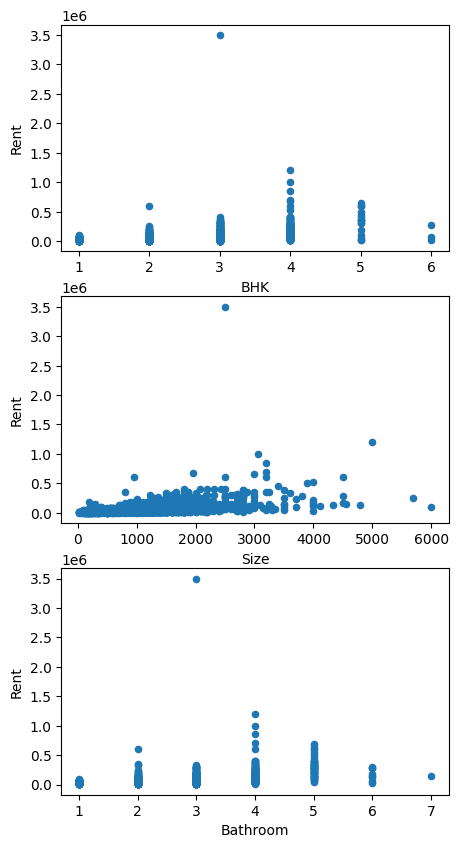

In [248]:
#sns.pairplot(data)
fig = plt.figure(figsize=(5,10))

ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

data_train.plot(x='BHK', y='Rent', ax=ax1, kind='scatter')
data_train.plot(x='Size', y='Rent', ax=ax2, kind='scatter')
data_train.plot(x='Bathroom', y='Rent', ax=ax3, kind='scatter')

plt.show()

In [249]:
data_train.describe().round(2)

,BHK,Rent,Size,Bathroom
count,3800.00,3800.00,3800.00,3800.00
mean,2.05,38567.88,914.96,1.92
std,0.84,85968.03,596.63,0.88
min,1.00,1500.00,20.00,1.00
25%,1.00,10000.00,550.00,1.00
50%,2.00,17000.00,800.00,2.00
75%,3.00,36000.00,1116.25,2.00
max,6.00,3500000.00,6000.00,7.00


In [271]:
train_corr = data_train[["BHK","Size","Bathroom","Rent"]]
train_corr.corr().round(2)

,BHK,Size,Bathroom,Rent
BHK,1.00,0.73,0.79,0.39
Size,0.73,1.00,0.73,0.45
Bathroom,0.79,0.73,1.00,0.47
Rent,0.39,0.45,0.47,1.00


#### variable catégorique


In [250]:
City = data_train['City'].value_counts()
City
#City est un objet Series qui contient les 'cities' en tant qu'index et le nombre d'occurrences de chaque 'city' en tant que valeurs correspondantes.

City
Mumbai       972
Bangalore    886
Chennai      813
Delhi        605
Kolkata      524
Name: count, dtype: int64

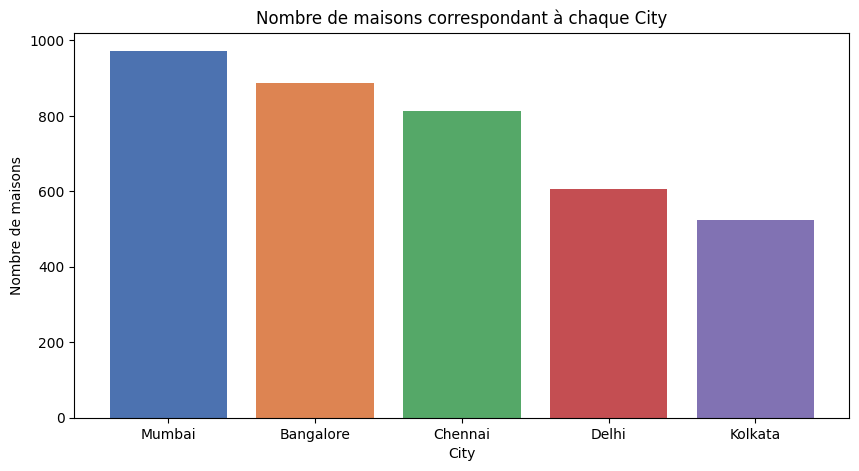

In [251]:
t= "Nombre de maisons correspondant à chaque City"
colores = sns.color_palette("deep",len(City))
#import matplotlib.cm as cm
#colores = cm.tab10.colors
#print(len(colores))

plt.rcParams["figure.figsize"]=[10,5]
plt.bar(City.index, City.values, color=colores)
plt.xlabel("City")
plt.ylabel("Nombre de maisons")
plt.title(t)
plt.draw()

/tmp/ipykernel_4067/1292836155.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data_train, x='City', y='Rent', palette=c_colores)


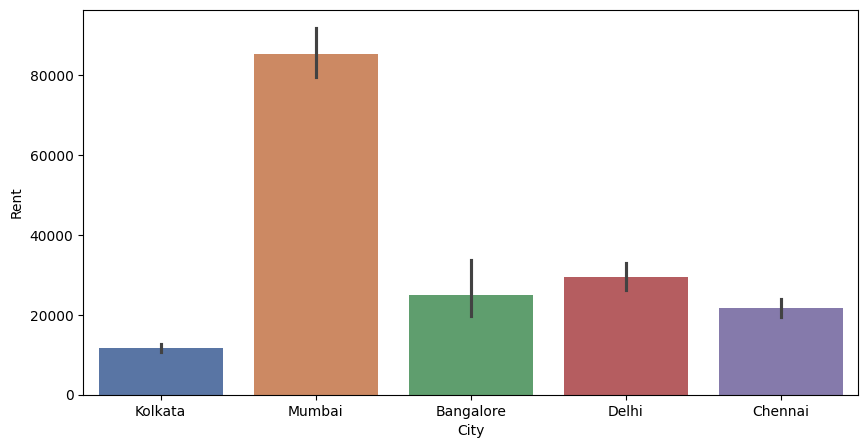

In [252]:
c_colores = sns.color_palette(colores)
sns.barplot(data = data_train, x='City', y='Rent', palette=c_colores)
plt.show()

In [253]:
#categorical_columns = data.select_dtypes( include= ['object']).columns
#for column in categorical_columns:
#    print(f"Column '{column}': {data[column].unique()}")

### 4. Model training (linear regression)

In [285]:
lr = LinearRegression()

lr.fit(data_train[['Size','Bathroom']],data_train['Rent'])

print(f' Coefficient b1: {lr.coef_}')
print(f' Intercept b0: {lr.intercept_}')

 Coefficient b1: [   33.0603693  29334.82263746]
 Intercept b0: -48027.00605242841


### Prédictions

In [287]:
train_predictions = lr.predict(data_train[['Size','Bathroom']])
print(train_predictions)
len(train_predictions)

[47009.04544942  7756.1120228  14368.18588224 ... 48463.70169849
 97833.10813006 58580.17470344]


3800

In [288]:
test_predictions = lr.predict(data_test[['Size','Bathroom']])
#print(test_predictions)
len(test_predictions)


946

In [289]:
train_mse = mean_squared_error(train_predictions, data_train['Rent'])
test_mse = mean_squared_error(test_predictions, data_test['Rent'])
print(train_mse)
print(test_mse)


5587418405.849918
2236634625.853198


In [290]:
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

74749.03615331718
47293.07164747494


In [291]:

print(r2_score(data_test['Rent'], test_predictions))
#data_test['Rent'].shape


-2.372915992632345


In [284]:
import statsmodels.api as sm
import pandas as pd

# Assume df is your data frame and 'target' is your dependent variable
# with 'feature1', 'feature2', ... as independent variables.

X = data_full[['Size','BHK','Bathroom']] # feature columns
y = data_full['Rent']  # target column

# Step 1: Adding a constant to the model (the intercept term)
X = sm.add_constant(X)

# Step 2: Model Specification
model = sm.OLS(y, X)

# Step 3: Fitting the Model
results = model.fit()

# Step 4: Displaying Summary Statistics
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rent   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     423.8
Date:                Thu, 23 Nov 2023   Prob (F-statistic):          6.46e-244
Time:                        18:59:29   Log-Likelihood:                -59638.
No. Observations:                4746   AIC:                         1.193e+05
Df Residuals:                    4742   BIC:                         1.193e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.879e+04   2806.207    -13.824      0.0

In [282]:
X

,const,Size
0,1.0,1100
1,1.0,800
2,1.0,1000
3,1.0,800
4,1.0,850
...,...,...
4741,1.0,1000
4742,1.0,2000
4743,1.0,1750
4744,1.0,1500
